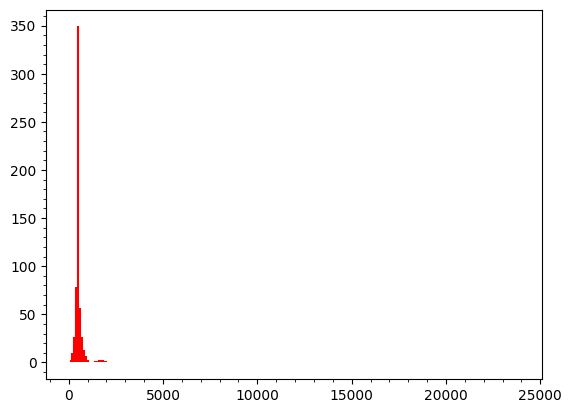

In [165]:
import matplotlib.pyplot as plt
from math import *
import numpy as np

SAMPLE_RATE = 48000

def make_twiddle(index: int, size: int, inverse: bool):
    const = -2.0 * pi / size
    angle = const * index

    twiddle = complex(cos(angle), sin(angle))

    if inverse:
        return twiddle.conjugate()
    else:
        return twiddle

def dft(signal, size: int, inverse: bool):
    # s = size // 2
    twiddles = [make_twiddle(i, size, inverse) for i in range(size)]
    spectrum = [0.0] * size

    for k in range(size):
        twiddle_index = 0

        spectrum[k] = 0.0

        for input in signal:
            twiddle = twiddles[twiddle_index]
            spectrum[k] += twiddle * input

            twiddle_index += k
            if twiddle_index >= len(twiddles):
                twiddle_index -= len(twiddles)

    return spectrum

signal = [sin(pi * 2 * (i / (SAMPLE_RATE / 480))) for i in range(1000)]

# plt.plot(signal)

spectrum = dft(signal, SAMPLE_RATE // 100, False)


fig, ax = plt.subplots()
plt.minorticks_on()

N = len(spectrum)
T = 1 / SAMPLE_RATE
xf = np.linspace(0.0, 1.0 / (2.0 * T), N // 2)

# max_freq = N // 2
# ax.stem(xf, 2.0 / N * np.abs(spectrum[:max_freq]), 'r-', markerfmt='')

freq_factor = SAMPLE_RATE / len(spectrum)
for i, f in enumerate(spectrum[:N // 2]):
    # plt.semilogy(i * freq_factor, 2 / N * abs(f.real), 'r-')
    plt.stem(i * freq_factor, abs(f.real), 'r-', markerfmt='')
